In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppressing all warnings
warnings.filterwarnings('ignore')

 - Question 1

In [2]:
virus_DF = pd.read_csv('virus_data.csv')
virus_DF.shape

(1250, 25)

 - Question 2

In [3]:
virus_DF["conversations_per_day"].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

 - Question 4

In [4]:
from sklearn.model_selection import train_test_split
state = 4+76
train_virus_df, test_virus_df = train_test_split(virus_DF, test_size=0.2, random_state=state)

- Question 5

In [5]:
train_virus_df.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [6]:
test_virus_df.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         23
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

 - Question 6

<Axes: >

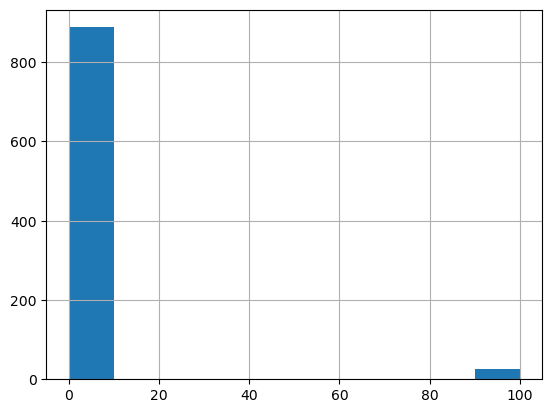

In [7]:
train_virus_df["household_income"].hist()

- Question 7

In [8]:
mean = train_virus_df["household_income"].mean()
median = train_virus_df["household_income"].median()
print(f"The mean household income {mean}, The median household income {median}")

The mean household income 3.535886214442013, The median household income 0.7


In [9]:
filtered_by_income = train_virus_df[train_virus_df["household_income"] < 3.5]
filtered_by_income["household_income"].count()

888

- We decided to replace the missing values with the median values, since the majority of the availabe values are under the mean

- Task A

In [10]:
replacement_value= train_virus_df["household_income"].median()
train_virus_df["household_income"] = train_virus_df["household_income"].fillna(replacement_value,inplace= True)

- Task B

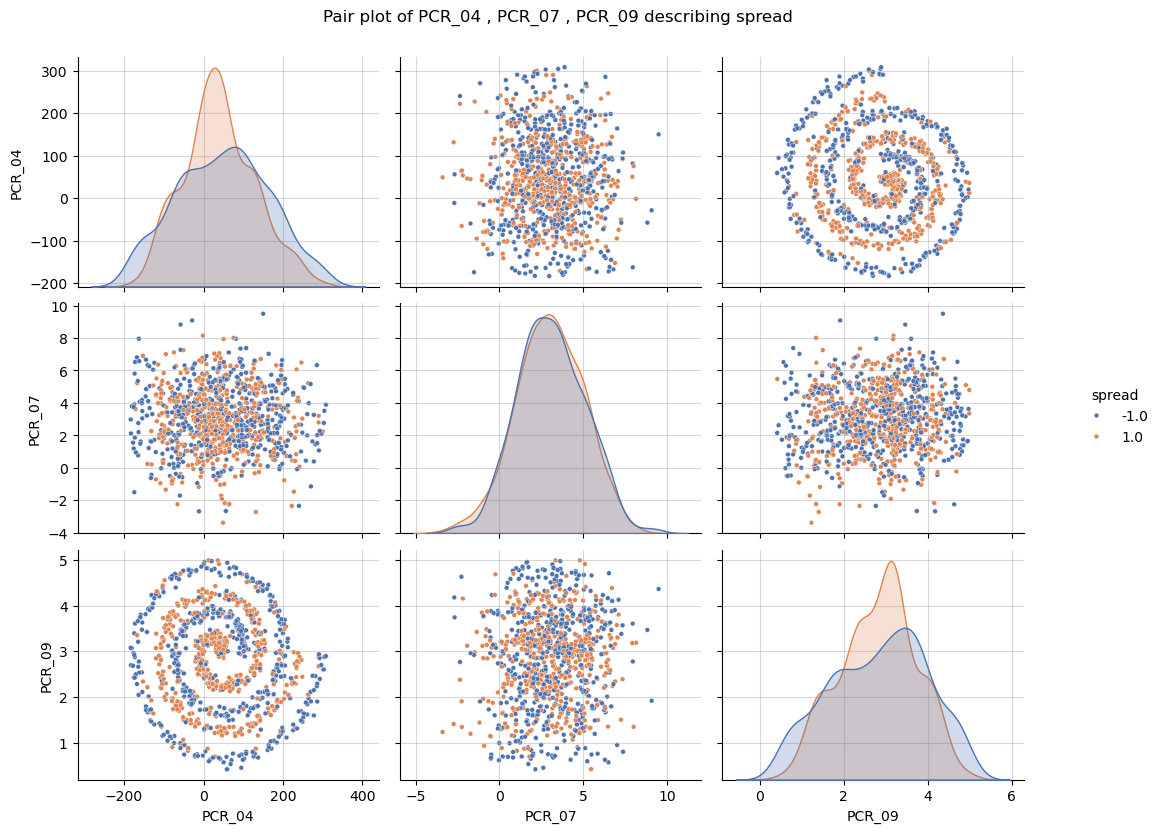

In [11]:
g=sns.pairplot(train_virus_df[['PCR_04', 'PCR_07', 'PCR_09','spread']], hue='spread', plot_kws={"s":12},palette = "deep")
g.fig.suptitle("Pair plot of PCR_04 , PCR_07 , PCR_09 describing spread", y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)


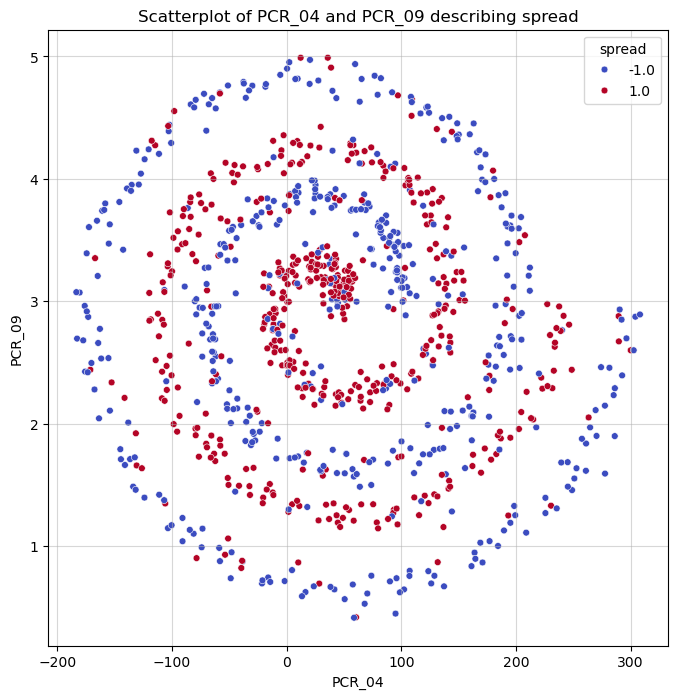

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train_virus_df, x='PCR_04', y='PCR_09', hue='spread', palette='coolwarm', s=24)
plt.title("Scatterplot of PCR_04 and PCR_09 describing spread")
plt.grid(alpha=0.5)
plt.show()

- Question 9

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial.distance import cdist

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        return self

    def predict(self, X):
        distances = cdist(X, self.X_train)
        indices = np.argpartition(distances, self.n_neighbors, axis=1)
        indices = indices[:, :self.n_neighbors]
        nearest_neighbors = self.y_train[indices]
        sum = np.sum(nearest_neighbors, axis=1)
        predictions = np.sign(sum)
        return predictions


* Question 10

Splitting data

In [14]:
spread_DF = virus_DF[["PCR_04","PCR_09","spread"]]

spread_X = spread_DF.drop("spread",axis = 1)
spread_y = spread_DF["spread"]

X_train, X_test, y_train, y_test = train_test_split(spread_X,
                                                    spread_y,
                                                    test_size = 0.2,
                                                    random_state=state)

Model creation and fitting

In [15]:
clf_1 = kNN(n_neighbors=1) # model instance
clf_1.fit(X= X_train, y= y_train) # fitting the model

kNN(n_neighbors=1)

Scoring the model: Training and testing data

In [16]:
train_acc = clf_1.score(X_train, y_train)
test_acc = clf_1.score(X_test, y_test)
print(f"Train accuracy is {train_acc}, Test accuracy is {test_acc}")

Train accuracy is 1.0, Test accuracy is 0.576


Visualization

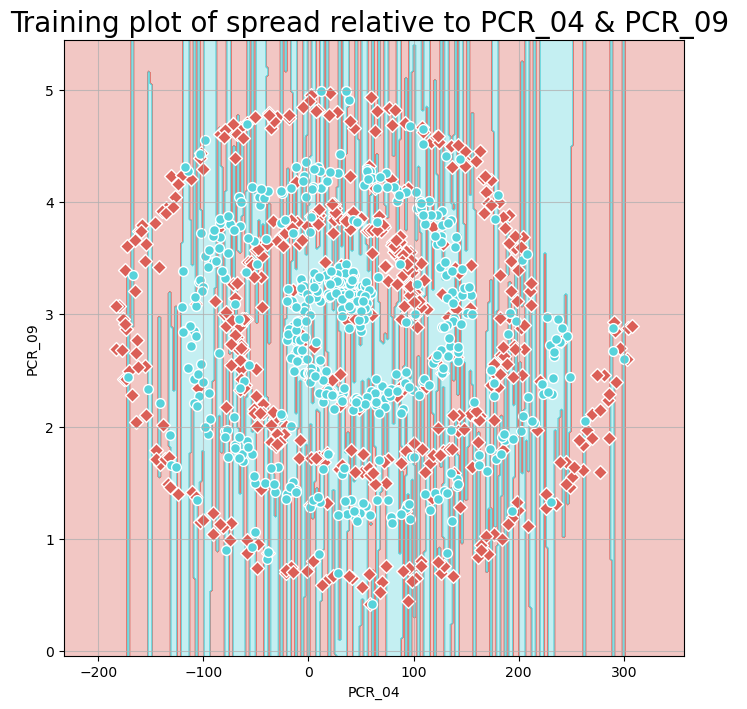

In [17]:
from visualize_clf import visualize_clf
# plotting
visualize_clf(clf = clf_1,
              X = X_train,
              Y = y_train,
              title ="Training plot of spread relative to PCR_04 & PCR_09 ",
              xlabel = "PCR_04",
              ylabel ="PCR_09")

* Question 11

Normalizing the data

In [18]:
spread_DF = virus_DF[["PCR_04","PCR_09","spread"]]

spread_X = spread_DF.drop("spread",axis = 1)
spread_y = spread_DF["spread"]

# Min max Scaling
max = 1
min = -1
X_std = (spread_X - spread_X.min(axis=0)) / (spread_X.max(axis=0) - spread_X.min(axis=0))
X_scaled = X_std * (max - min) + min

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    spread_y,
                                                    test_size = 0.2,
                                                    random_state=state)


In [19]:
clf_1 = kNN(n_neighbors=1) # model instance
clf_1.fit(X= X_train, y= y_train) # fitting the model

kNN(n_neighbors=1)

In [20]:
train_acc = clf_1.score(X_train, y_train)
test_acc = clf_1.score(X_test, y_test)
print(f"Train accuracy is {train_acc}, Test accuracy is {test_acc}")

Train accuracy is 1.0, Test accuracy is 0.724


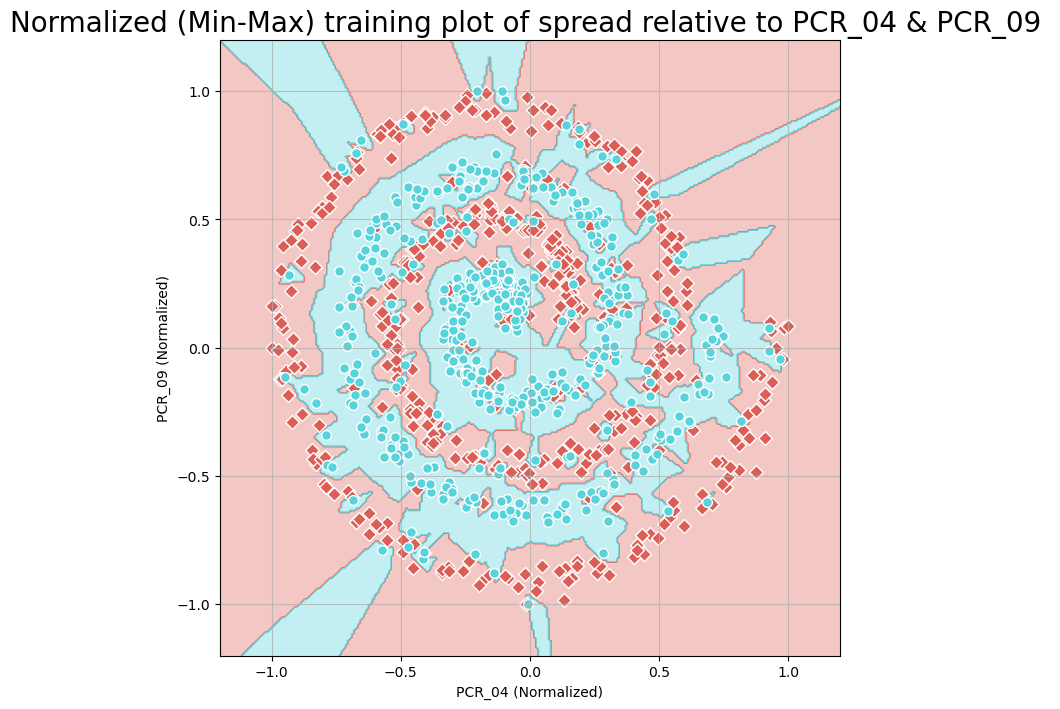

In [21]:
from visualize_clf import visualize_clf
# plotting
visualize_clf(clf = clf_1,
              X = X_train,
              Y = y_train,
              title ="Normalized (Min-Max) training plot of spread relative to PCR_04 & PCR_09 ",
              xlabel = "PCR_04 (Normalized)",
              ylabel ="PCR_09 (Normalized)")

* Question 12

In [22]:
spread_DF = virus_DF[["PCR_04","PCR_09","spread"]]

spread_X = spread_DF.drop("spread",axis = 1)
spread_y = spread_DF["spread"]

# Min max Scaling
max = 1
min = -1
X_std = (spread_X - spread_X.min(axis=0)) / (spread_X.max(axis=0) - spread_X.min(axis=0))
X_scaled = X_std * (max - min) + min

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    spread_y,
                                                    test_size = 0.2,
                                                    random_state=state)
# fitting model
clf_5 = kNN(n_neighbors=5) # model instance
clf_5.fit(X= X_train, y= y_train) # fitting the model

kNN(n_neighbors=5)

In [23]:
train_acc = clf_5.score(X_train, y_train)
test_acc = clf_5.score(X_test, y_test)
print(f"For k = 5 ,Train accuracy is {train_acc}, Test accuracy is {test_acc}")

For k = 5 ,Train accuracy is 0.846, Test accuracy is 0.82


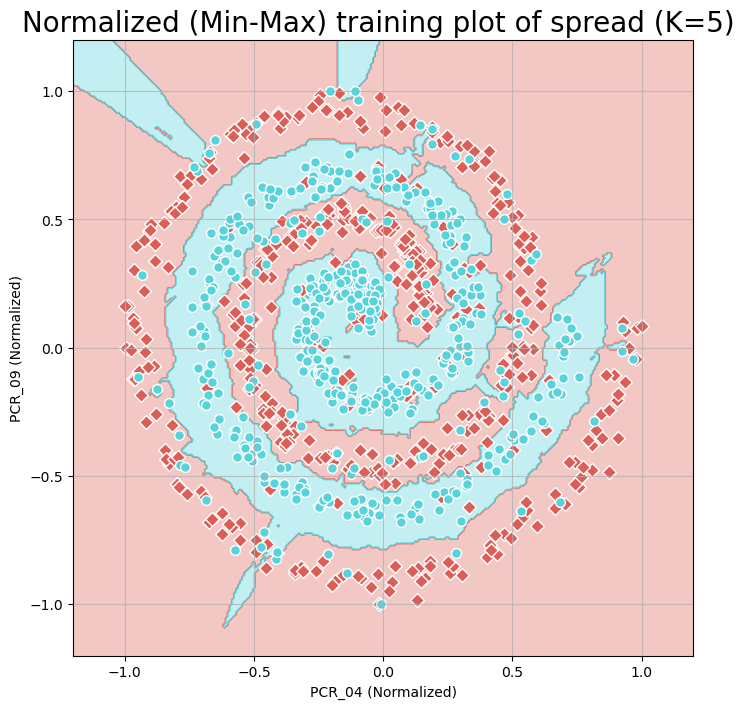

In [24]:
from visualize_clf import visualize_clf
# plotting
visualize_clf(clf = clf_5,
              X = X_train,
              Y = y_train,
              title ="Normalized (Min-Max) training plot of spread (K=5) ",
              xlabel = "PCR_04 (Normalized)",
              ylabel ="PCR_09 (Normalized)")

* Task E

In [25]:
# creating the new boolean feature
virus_DF["SpecialProperty"] = virus_DF["blood_type"].isin(["O+", "B+"])

# removing the blood_type feature
virus_DF.drop(columns=["blood_type"], inplace=True)

Plotting for univariate analyses


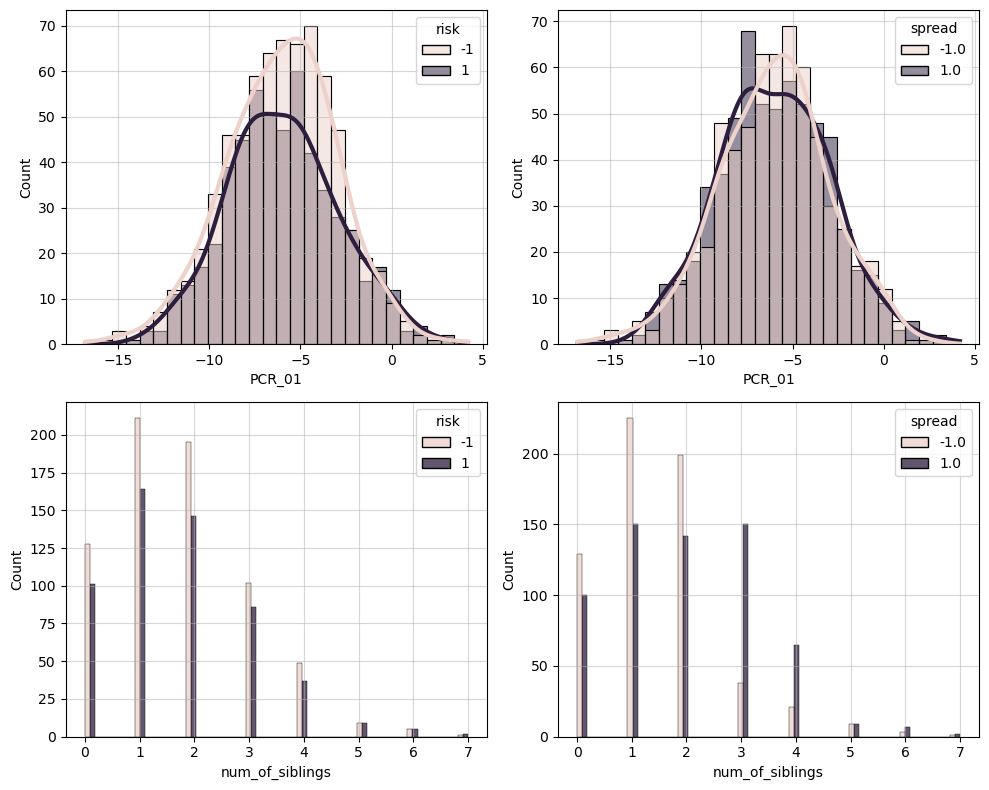

In [26]:
COL_NAME = ['PCR_01', 'num_of_siblings']
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS)) 
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
        
    isContinuous = "float" in virus_DF[column].dtype.name
    sns.histplot(data=virus_DF, x=column, hue=cls, line_kws={"linewidth": 3}, 
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()
